In [38]:
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math
import yfinance as yf
from pmdarima.arima import auto_arima
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
data=pd.read_csv("TSLA.CSV")

In [3]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [4]:
data=data[['Date','Close']]

In [5]:
data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    758 non-null    object 
 1   Close   758 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.0+ KB


In [7]:
data['Date']=pd.to_datetime(data.Date)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [9]:
data=data.set_index("Date")

In [10]:
data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [11]:
data['Close'].describe()

count     758.000000
mean      485.531513
std       353.160353
min        35.793999
25%       112.323500
50%       488.125000
75%       762.142502
max      1229.910034
Name: Close, dtype: float64

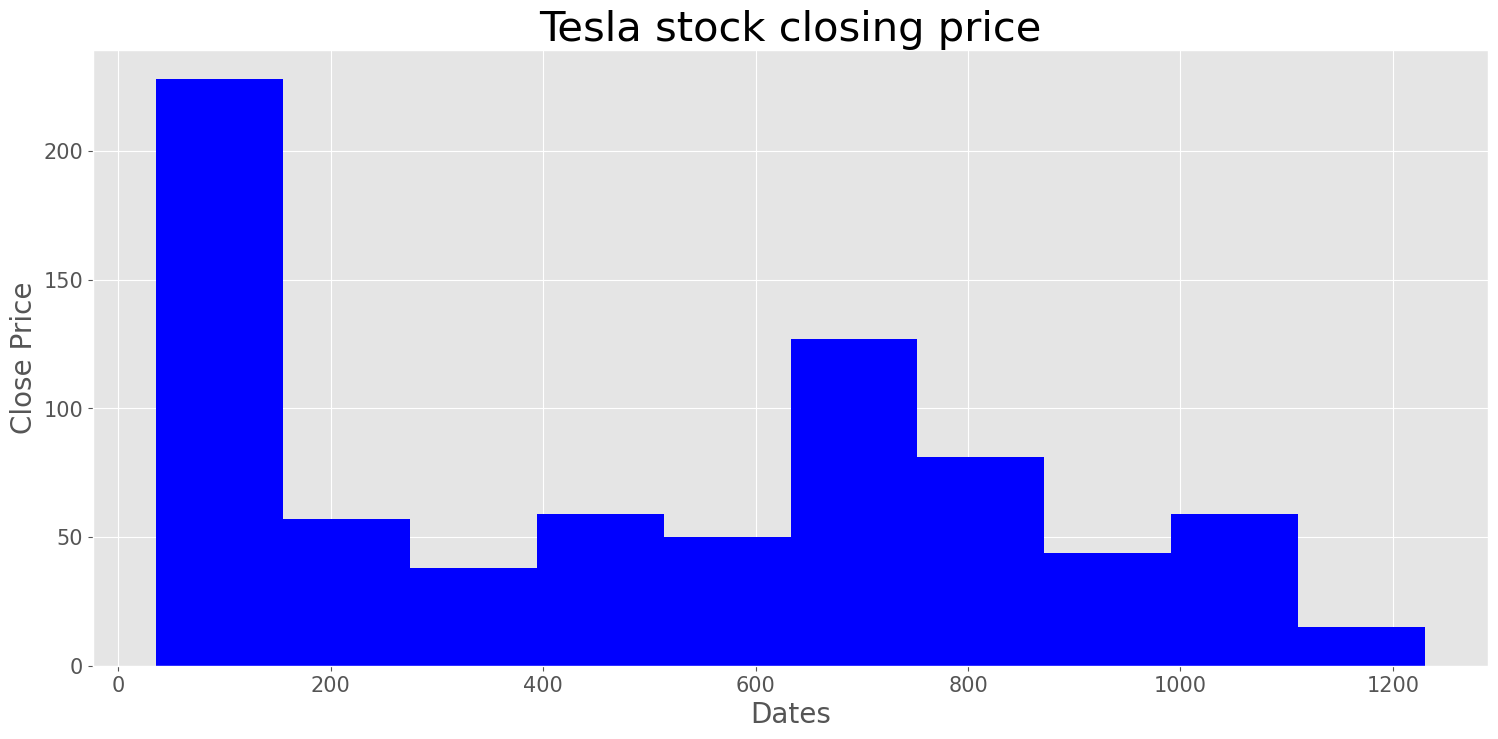

In [12]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Price',fontsize=20)
plt.yticks(fontsize=15)
plt.hist(data['Close'],linewidth=3,color='blue')
plt.title('Tesla stock closing price',fontsize=30)
plt.show()

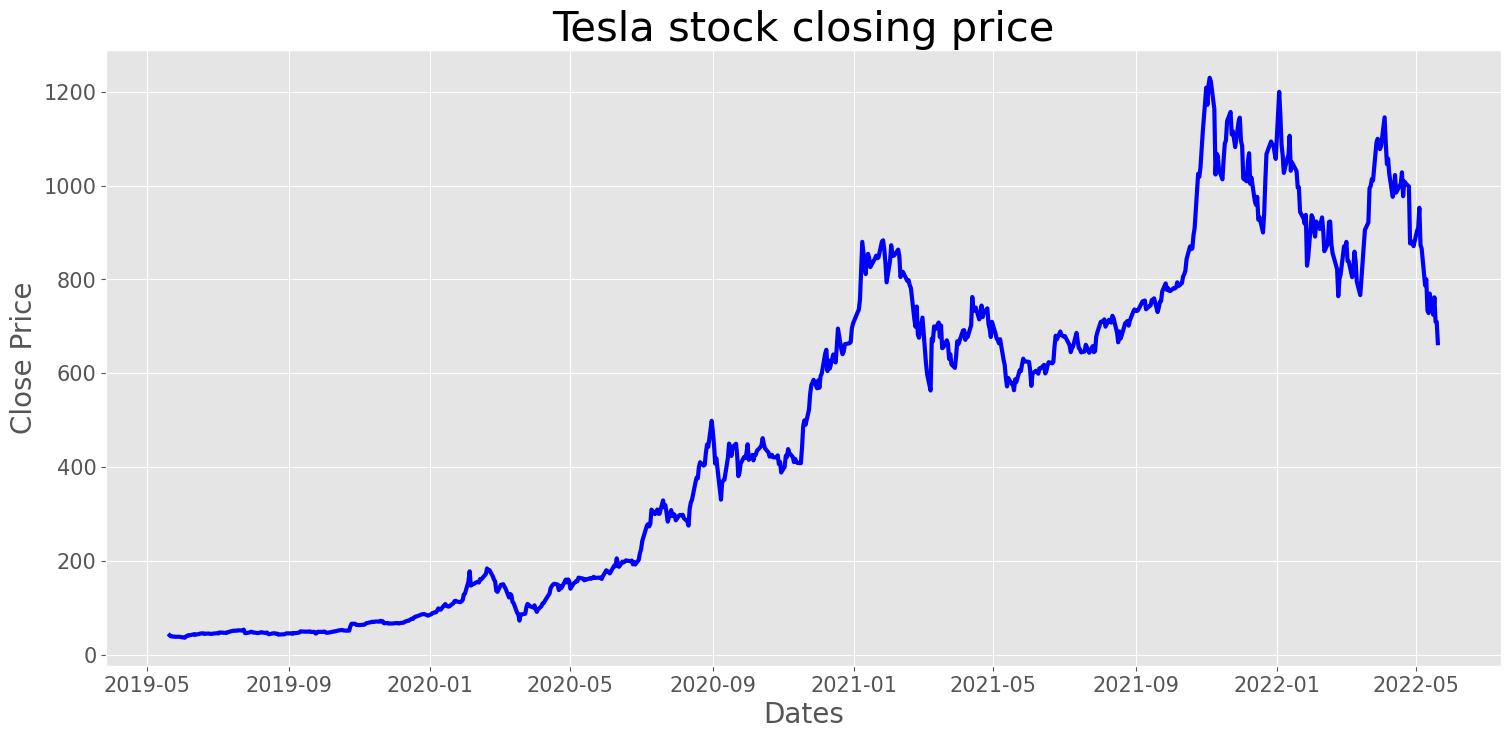

In [13]:
plt.style.use('ggplot')
plt.figure(figsize=(18,8))
plt.grid(True)
plt.xlabel('Dates',fontsize=20)
plt.xticks(fontsize=15)
plt.ylabel('Close Price',fontsize=20)
plt.yticks(fontsize=15)
plt.plot(data['Close'],linewidth=3,color='blue')
plt.title('Tesla stock closing price',fontsize=30)
plt.show()

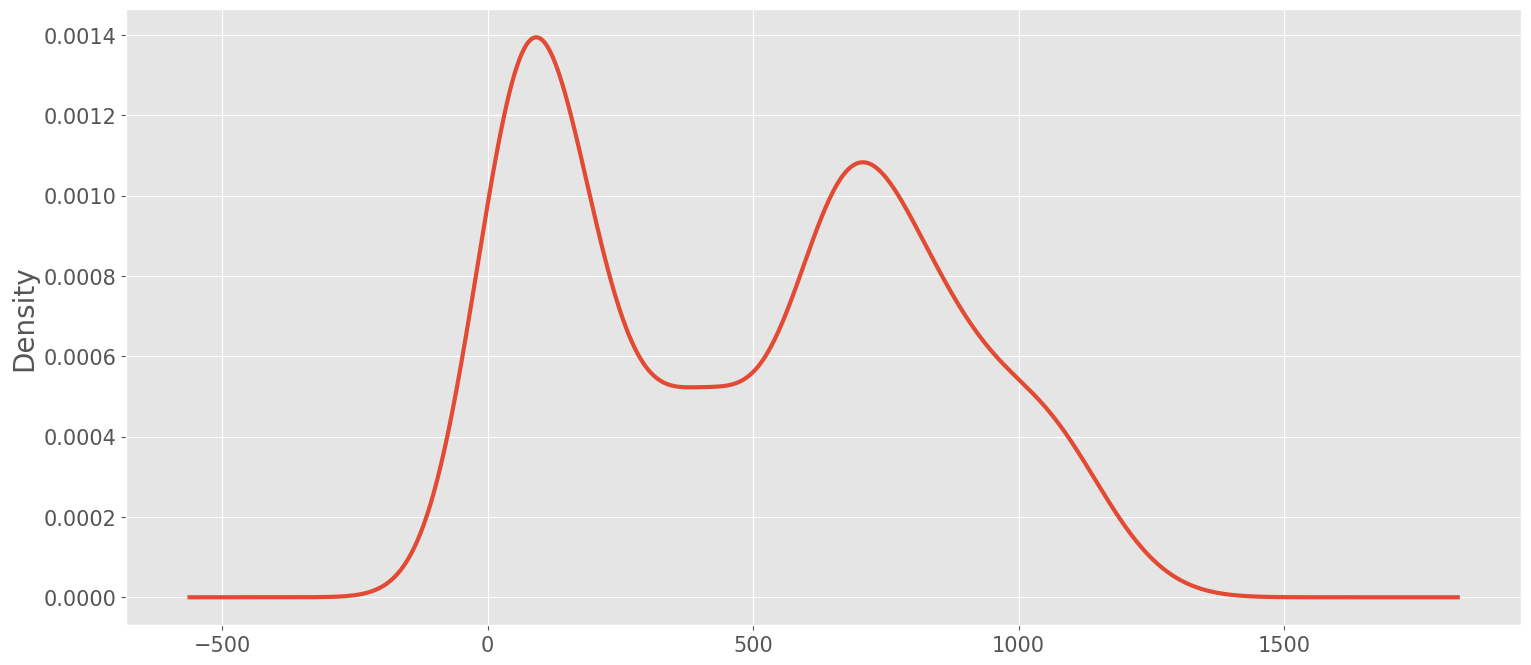

In [14]:
df_close=data['Close']
df_close.plot(kind='kde',figsize=(18,8),linewidth=3)
plt.xticks(fontsize=15)
plt.grid('both')
plt.ylabel('Density',fontsize=20)
plt.yticks(fontsize=15)
plt.show()

## taking rolling mean ,i.e., mean in every window makes graph smooth

In [15]:
rolmean=data['Close'].rolling(12).mean()
# mean with window size of 12

In [16]:
rolmean

Date
2019-05-21           NaN
2019-05-22           NaN
2019-05-23           NaN
2019-05-24           NaN
2019-05-28           NaN
                 ...    
2022-05-16    826.467504
2022-05-17    817.371668
2022-05-18    801.277501
2022-05-19    784.625000
2022-05-20    760.565002
Name: Close, Length: 758, dtype: float64

In [17]:
rolstd=data['Close'].rolling(12).std()

In [18]:
rolstd

Date
2019-05-21          NaN
2019-05-22          NaN
2019-05-23          NaN
2019-05-24          NaN
2019-05-28          NaN
                ...    
2022-05-16    78.887958
2022-05-17    79.606002
2022-05-18    80.253903
2022-05-19    76.455365
2022-05-20    63.033361
Name: Close, Length: 758, dtype: float64

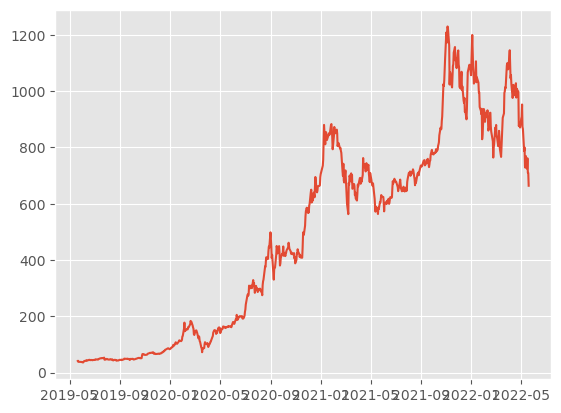

In [19]:
plt.plot(data['Close'])

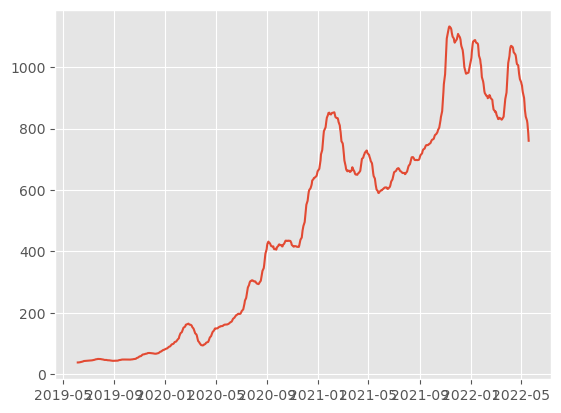

In [20]:
plt.plot(rolmean)
# see it makes graph smooth

# dickeyfuller test
to check the stationary and non stationary data

if p<0.05 then data is stationary

In [21]:
from statsmodels.tsa.stattools import adfuller

In [22]:
adft=adfuller(data['Close'])

In [23]:
output= pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])

In [24]:
output

Test Statistics                 -1.363009
p-value                          0.599876
No. of lags used                 9.000000
Number of observations used    748.000000
dtype: float64

here p>0.05 so it is non stationary

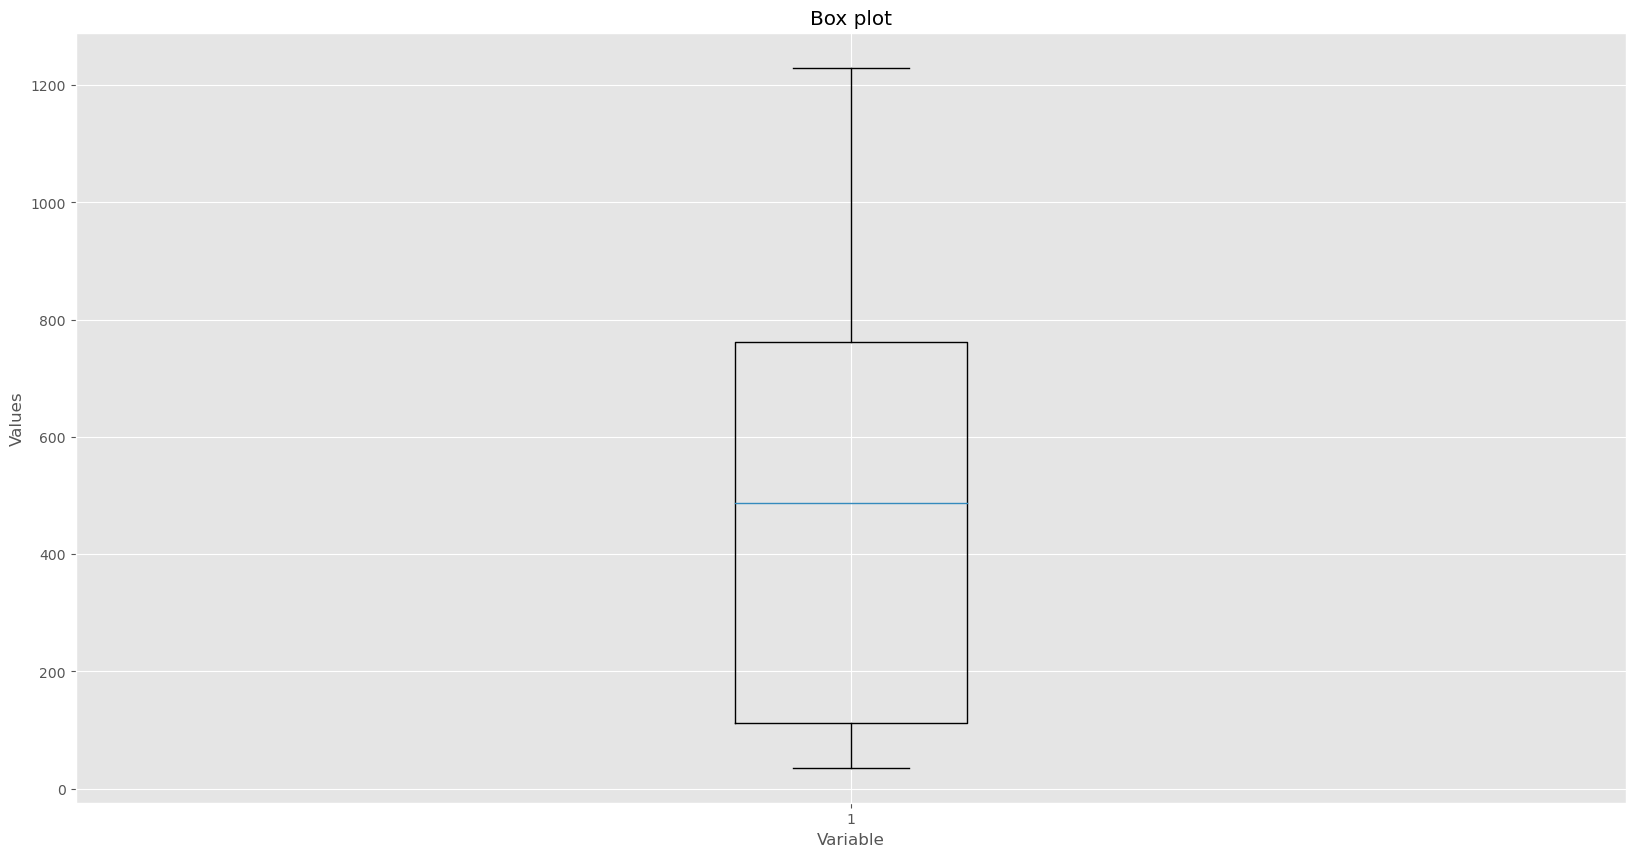

In [25]:
fig,ax=plt.subplots(figsize=(20,10))
ax.boxplot(data['Close'])
ax.set_xlabel('Variable')
ax.set_ylabel('Values')
ax.set_title('Box plot')
plt.show()

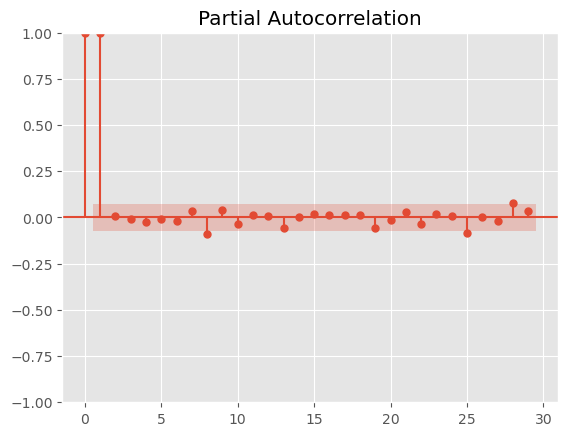

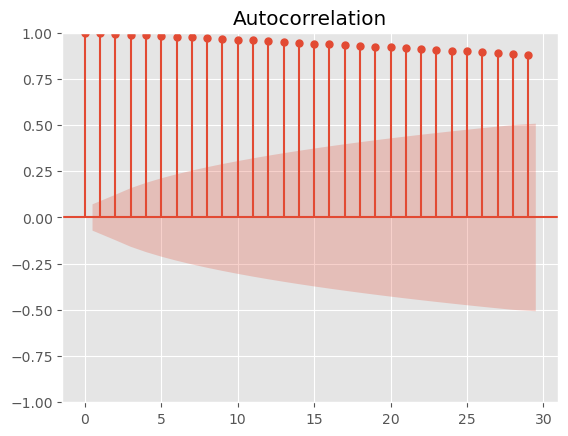

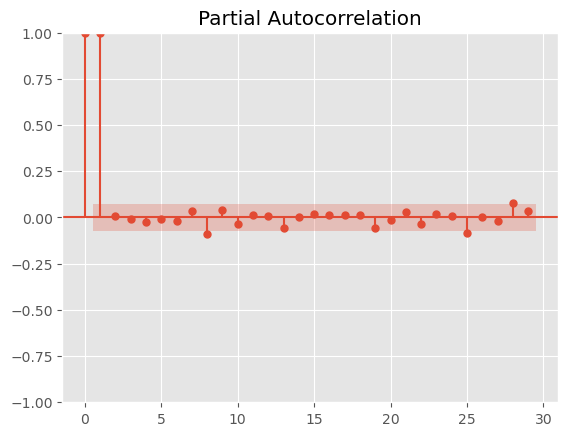

In [26]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(data['Close'])
plot_pacf(data['Close'])

In [27]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [28]:
train_data=data['Close'][0:-60]
test_data=data['Close'][-60:]

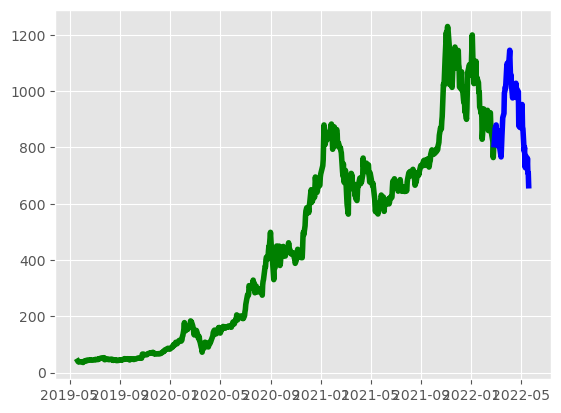

In [29]:
plt.plot(train_data,'green',label='Train data',linewidth=4)
plt.plot(test_data,'blue',label='Test data',linewidth=4)

In [30]:
history=[x for x in train_data]
model=ARIMA(history,order=(1,1,2))
model_fit=model.fit()
y_forecast=model_fit.forecast()
print(f"this is my forecast value {y_forecast[0]}")
print(f"this is my orginal value {test_data[0]}")
print(f"this is mse {mean_squared_error([test_data[0]],y_forecast)}")

this is my forecast value 800.9515155786806
this is my orginal value 809.8699951171875
this is mse 79.53927727876551
